In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
dataset=pd.read_csv('BankNote_Authentication.csv')

In [4]:
print(dataset.columns)

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


In [5]:
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## **Preprocessing Dataset**
### 1. Checking the correctness of dataset by checking any other value of class from bottom



In [6]:
dataset.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


Since we have to identify whether a note bundle is fake or real therefore we set our target variable as class

```
0 = FAKE

1 = REAL
```

In [7]:
print("Shape of Dataset:\n", dataset.shape)
print("\n")
dataset.info()

Shape of Dataset:
 (1372, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### 2. Checking distribution of dataset

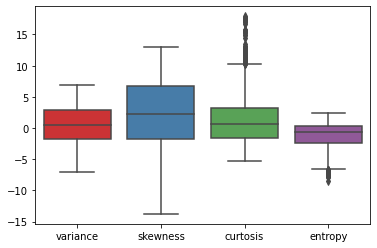

In [8]:
sns.boxplot(data=dataset.iloc[:,:-1], palette="Set1")
plt.rcParams['figure.figsize'] = [15, 10]

### 3. Checking correlation in the dataset

In [9]:
correlationVal = dataset.corr()

# producing a heatmap for correlation values of dataset
correlationVal.style.background_gradient(cmap='PuBu', low=0, high=0, axis=0, subset=None)

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


**Findings:**

1. Data is well distributed as we can see in box plot which thus gives class prediction in the set { 0, 1 }.
2. Variance and Skewness has an inverse effect on Class label as negative correlation. 
3. Variance and Skewness has the maximum effect on Class label. We will plot all the graphs considering these two variables.

## **Python pyspark** 

The vision is to include the power of Distributed Computing which is provided in the **pyspark** library in Python built alongside Apache Spark community. Since we aim to include parallelism the library and its functions will prove helpful in helping us achieve false note detection efficiently.

In [10]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 198 kB 36.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=dab0a4f40bbe434ea627c7db535cb9fa9448caf7b453a4a20bd3562fe814a65f
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [11]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

SparkContext() is basically the entry point similar to object initiation in OOPS

SparkSession() is for the use of inner disributed features of system essential for disributed computing(here performed on MacOS with 8 threads)

In [12]:
sc = SparkContext.getOrCreate();
spark = SparkSession(sc)

### 1. Conversion of Dataset(curently in Python Dataframe) to Python Numpy Arrays

The below is performed since training and testing of dataset requires data to be in numpy array format

In [13]:
print("4 Variables determing o/p")
X=dataset.iloc[:,0:4].values
print(X)

print("\nClass values")
Y=dataset.iloc[:,-1].values
print(Y)

4 Variables determing o/p
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]

Class values
[0 0 0 ... 1 1 1]


### 2. Dataset division into Training and Testing

In [14]:
XTrain,XTest,YTrain,YTest=train_test_split(X, Y, test_size=0.2, random_state=3)

We'll be performing Logistic Regression which is a technique used model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. 

Here if class value returned:

0 = FAKE

1 = REAL

### 3. Importing Necessary Libs

In [15]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import LogisticRegressionWithLBFGS,SVMWithSGD,LogisticRegressionWithSGD,NaiveBayes

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=3)

In [17]:
data=[]
for i in range(len(X_train)):
    data.append(LabeledPoint(y_train[i],X_train[i]))

In [18]:
print(data[:10])

[LabeledPoint(0.0, [2.9719,6.8369,-0.2702,0.71291]), LabeledPoint(1.0, [-0.90784,-7.9026,6.7807,0.34179]), LabeledPoint(1.0, [-0.97325,-6.4168,5.6026,1.0323]), LabeledPoint(1.0, [-1.3414,-1.9162,-0.15538,-0.11984000000000002]), LabeledPoint(1.0, [-0.0012852,0.13863,-0.19651,0.0081754]), LabeledPoint(0.0, [-1.8411,10.8306,2.7689999999999997,-3.0901]), LabeledPoint(1.0, [-1.8974,3.5074,-1.7842,-3.8491]), LabeledPoint(1.0, [-2.3629,-0.10554000000000001,1.9336,1.1358]), LabeledPoint(1.0, [-2.3147,3.6668,-0.6969,-1.2474]), LabeledPoint(0.0, [1.9358,8.1654,-0.023425,-2.2586])]


The confusion matrix is:

[[168   0]
 [  8  99]]

The accuracy of the Logistic Regression With LBFGS is: 97.0909090909091%


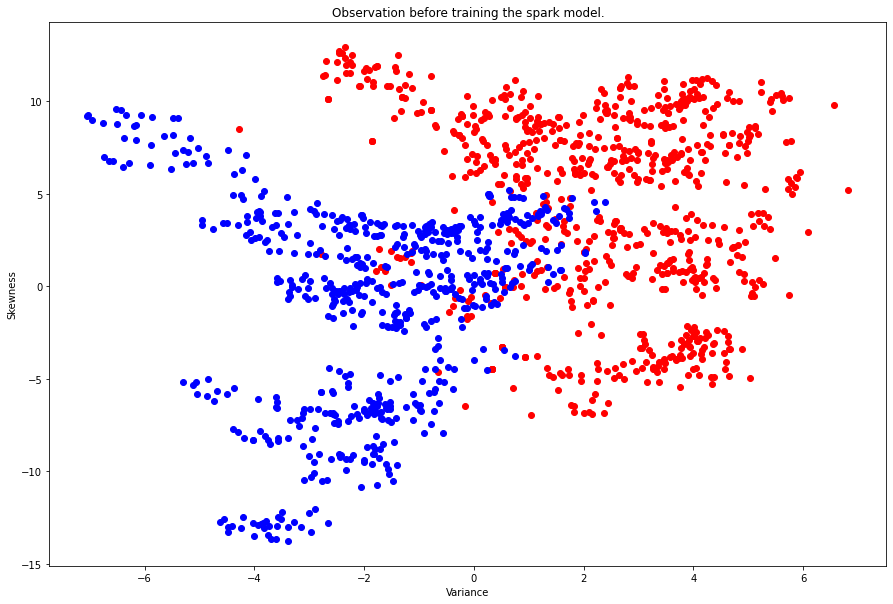

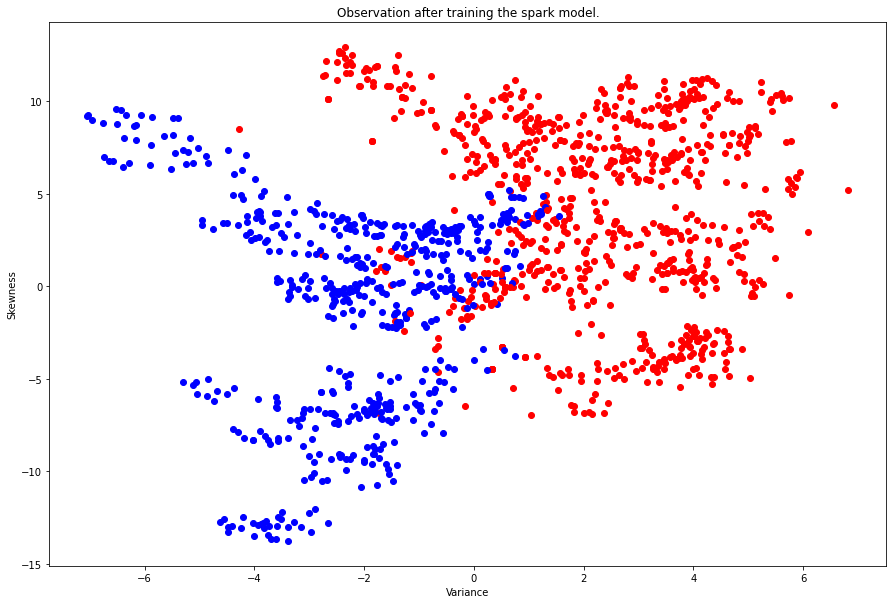

In [19]:
dic={}


lrm1 = LogisticRegressionWithLBFGS.train(sc.parallelize(data), iterations=1000)     
y_predict=lrm1.predict(sc.parallelize(X_test)).collect()
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
acc=accuracy_score(y_test,y_predict)
dic["Logistic Regression With LBFGS"]=acc
print("The confusion matrix is:")
print("")
print(cm)
print("")
print("The accuracy of the {} is: {}%".format("Logistic Regression With LBFGS",acc*100))


for i in range(len(X)):
    if(Y[i]==1):
        plt.scatter(X[i][0],X[i][1],color="blue")
    if(Y[i]==0):
        plt.scatter(X[i][0],X[i][1],color="red")

plt.title("Observation before training the spark model.")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()
y_whole=lrm1.predict(sc.parallelize(X)).collect()
plt.figure(3)
for i in range(len(X)):
    if(y_whole[i]==1):
        plt.scatter(X[i][0],X[i][1],color="blue")
    if(y_whole[i]==0):
        plt.scatter(X[i][0],X[i][1],color="red")
plt.title("Observation after training the spark model.")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()

/usr/local/lib/python3.7/dist-packages/pyspark/mllib/classification.py:327: FutureWarning: Deprecated in 2.0.0. Use ml.classification.LogisticRegression or LogisticRegressionWithLBFGS.
  "LogisticRegressionWithLBFGS.", FutureWarning)


The confusion matrix is:

[[168   0]
 [  8  99]]

The accuracy of the Logistic Regression With SGD is: 97.0909090909091%
The Red points are : Fake
The Blue points are: Real


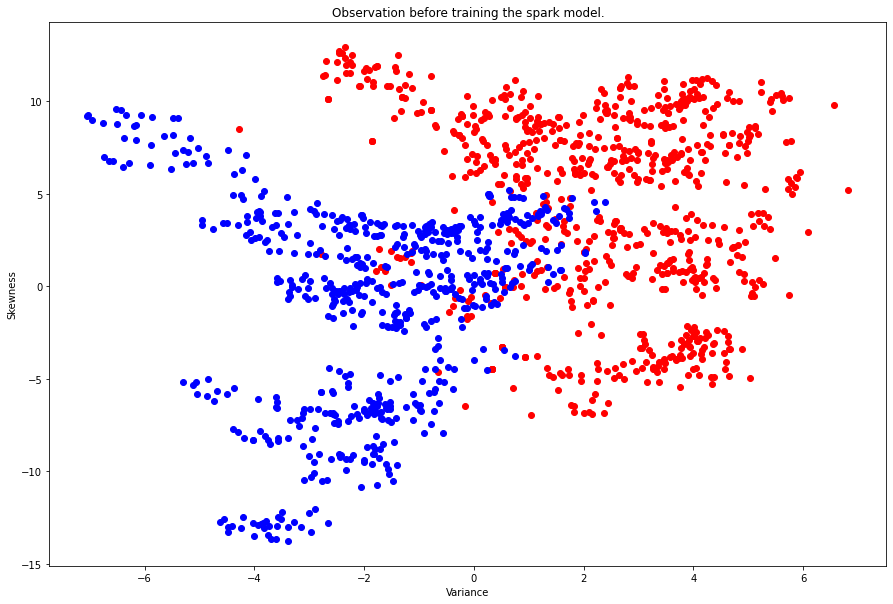

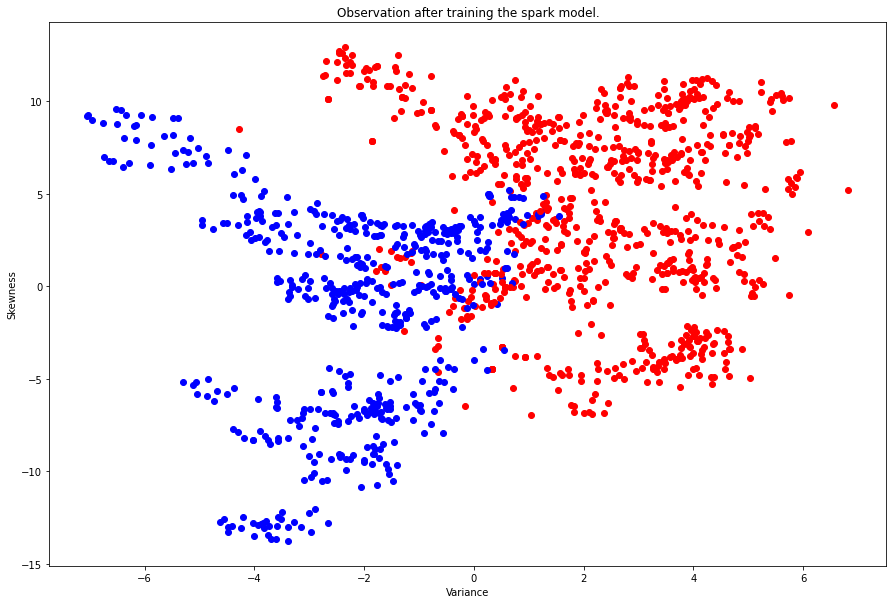

In [20]:
lrm2 = LogisticRegressionWithSGD.train(sc.parallelize(data), iterations=1000)
y_predict=lrm2.predict(sc.parallelize(X_test)).collect()
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
acc=accuracy_score(y_test,y_pred=y_predict)
dic["Logistic Regression With SGD"]=acc
print("The confusion matrix is:")
print("")
print(cm)
print("")
print("The accuracy of the {} is: {}%".format("Logistic Regression With SGD",acc*100))

for i in range(len(X)):
    if(Y[i]==1):
        plt.scatter(X[i][0],X[i][1],color="blue")
    if(Y[i]==0):
        plt.scatter(X[i][0],X[i][1],color="red")
print("The Red points are : Fake")
print("The Blue points are: Real")
plt.title("Observation before training the spark model.")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()
y_whole=lrm2.predict(sc.parallelize(X)).collect()
plt.figure(3)
for i in range(len(X)):
    if(y_whole[i]==1):
        plt.scatter(X[i][0],X[i][1],color="blue")
    if(y_whole[i]==0):
        plt.scatter(X[i][0],X[i][1],color="red")
plt.title("Observation after training the spark model.")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()

The confusion matrix is:

[[168   0]
 [  9  98]]

The accuracy of the SVM With SGD is: 96.72727272727273%
The Red points are : Fake
The Blue points are: Real


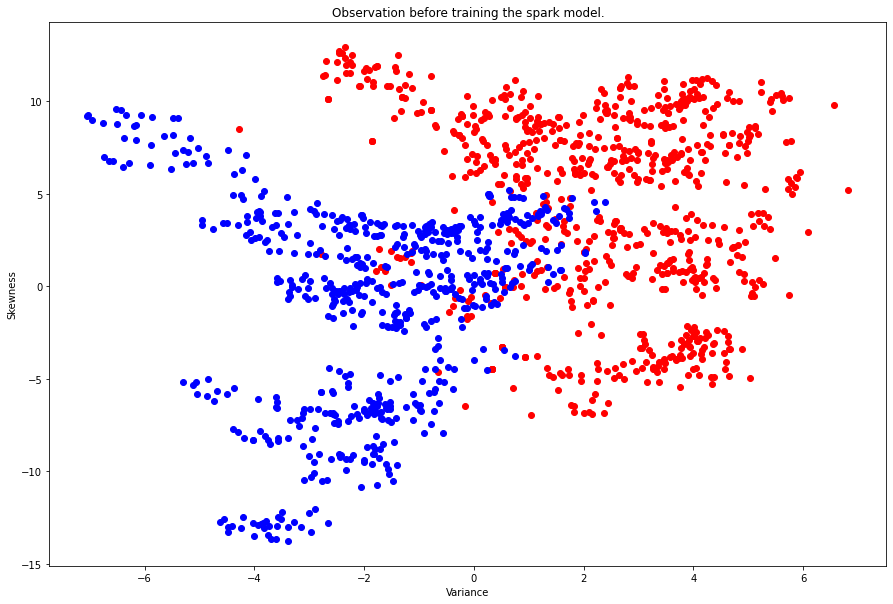

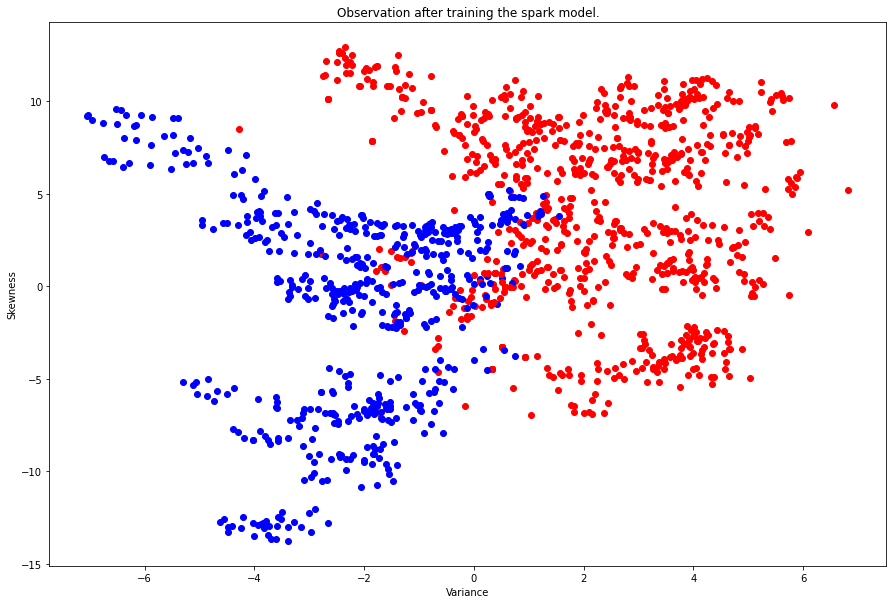

In [21]:
lrm3 = SVMWithSGD.train(sc.parallelize(data), iterations=1000)
y_predict=lrm3.predict(sc.parallelize(X_test)).collect()
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
acc=accuracy_score(y_test,y_pred=y_predict)
dic["SVM With SGD"]=acc
print("The confusion matrix is:")
print("")
print(cm)
print("")
print("The accuracy of the {} is: {}%".format("SVM With SGD",acc*100))

for i in range(len(X)):
    if(Y[i]==1):
        plt.scatter(X[i][0],X[i][1],color="blue")
    if(Y[i]==0):
        plt.scatter(X[i][0],X[i][1],color="red")
print("The Red points are : Fake")
print("The Blue points are: Real")
plt.title("Observation before training the spark model.")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()
y_whole=lrm3.predict(sc.parallelize(X)).collect()
plt.figure(3)
for i in range(len(X)):
    if(y_whole[i]==1):
        plt.scatter(X[i][0],X[i][1],color="blue")
    if(y_whole[i]==0):
        plt.scatter(X[i][0],X[i][1],color="red")
plt.title("Observation after training the spark model.")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()

The confusion matrix is:

[[158  10]
 [  2 105]]

The accuracy of the Random Forest is: 95.63636363636364%
The Red points are : Fake
The Blue points are: Real


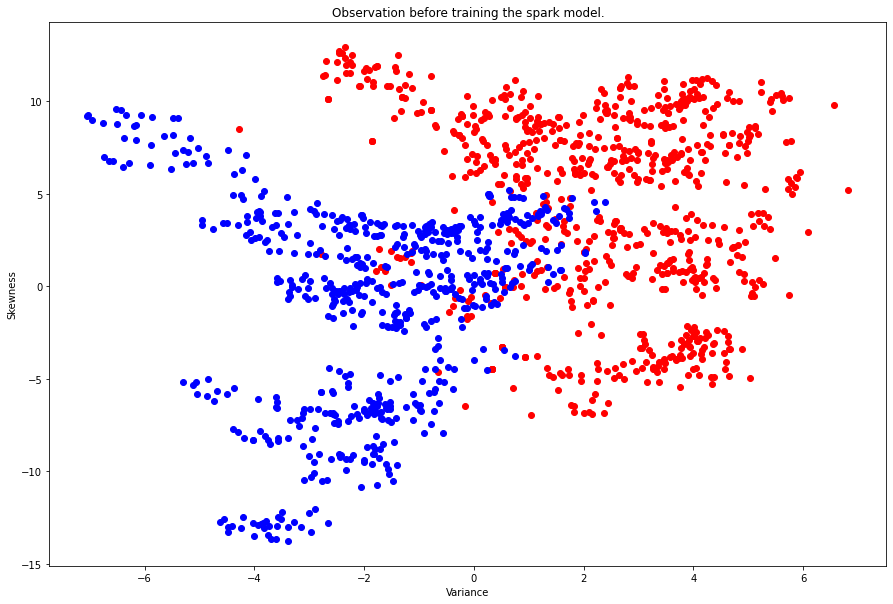

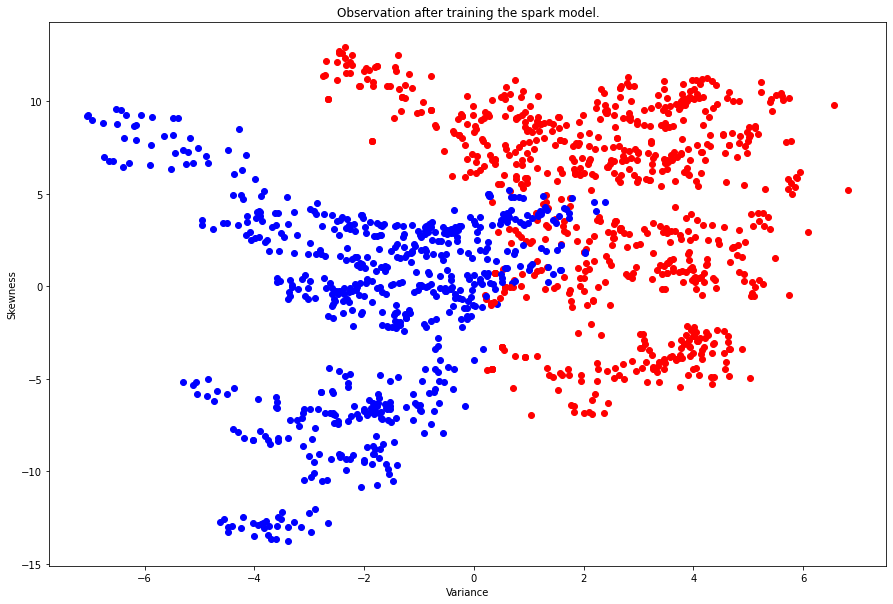

In [22]:
from pyspark.mllib.tree import RandomForest
lrm4 = RandomForest.trainClassifier(sc.parallelize(data),2,{},100)
y_predict=lrm4.predict(sc.parallelize(X_test)).collect()
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
acc=accuracy_score(y_test,y_pred=y_predict)
dic["Random Forest"]=acc
print("The confusion matrix is:")
print("")
print(cm)
print("")
print("The accuracy of the {} is: {}%".format("Random Forest",acc*100))

for i in range(len(X)):
    if(Y[i]==1):
        plt.scatter(X[i][0],X[i][1],color="blue")
    if(Y[i]==0):
        plt.scatter(X[i][0],X[i][1],color="red")
print("The Red points are : Fake")
print("The Blue points are: Real")
plt.title("Observation before training the spark model.")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()
y_whole=lrm4.predict(sc.parallelize(X)).collect()
plt.figure(3)
for i in range(len(X)):
    if(y_whole[i]==1):
        plt.scatter(X[i][0],X[i][1],color="blue")
    if(y_whole[i]==0):
        plt.scatter(X[i][0],X[i][1],color="red")
plt.title("Observation after training the spark model.")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()

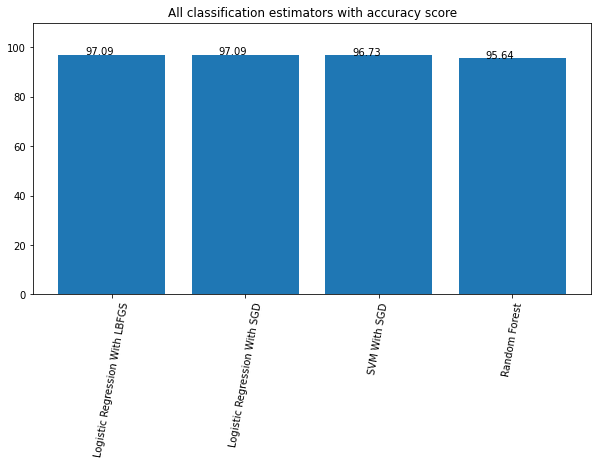

In [23]:
Estimators=[]
Accuracy=[]
for i in dic:
    Estimators.append(i)
    Accuracy.append(dic[i]*100)
d={'Estimators':Estimators,"Accuracy":Accuracy}
df=pd.DataFrame(data=d)
plt.rcParams['figure.figsize'] = [10, 5]
plt.ylim(0,110)
plt.title("All classification estimators with accuracy score")
bars=plt.bar(x=Estimators,height=Accuracy)
for bar in bars:
    yval = round(bar.get_height(),2)
    plt.text(bar.get_x()+0.2, round((yval + .005),2), yval)
plt.xticks(rotation=80)
plt.show()

Checking of the Unlabeled Notes
Since We can deduce that the notes which are real and considered as fake has a huge impact on the economy as the real notes are being discarded considered as fake notes. i.e.

Actual Value of note: - 1

Predicted Value of note: - 0

We will check the notes which are labeled as fakes and are actually real by the different models and determine whether the different models capture and labeled these notes correctly.

Using Logistic Regression With LBFGS

In [24]:
y_wrong_lbfgs=[]
y_whole_lbfgs=lrm1.predict(sc.parallelize(X_test)).collect()
for i in range(len(y_whole_lbfgs)):
    if(y_test[i]==1 and y_whole_lbfgs[i]==0):
        y_wrong_lbfgs.append(X_test[i])
y_wrong_lbfgs=np.array(y_wrong_lbfgs)
print(y_wrong_lbfgs)
print("*"*45)

[[ 0.24394   1.4733   -1.4192   -0.58535 ]
 [ 0.50225   0.65388  -1.1793    0.39998 ]
 [ 0.518     0.25865  -0.84085   0.96118 ]
 [ 0.84546   3.4826   -3.6307   -1.3961  ]
 [ 1.3403    4.1323   -4.7018   -2.5987  ]
 [ 0.12126   0.22347  -0.47327   0.97024 ]
 [-1.4375   -1.8624    4.026     0.55127 ]
 [ 0.66365  -0.045533 -0.18794   0.23447 ]]
*********************************************


Using Logistic Regression With SGD

In [25]:
y_wrong_sgd=[]
y_whole_sgd=lrm2.predict(sc.parallelize(y_wrong_lbfgs)).collect()
for i in range(len(y_whole_sgd)):
    if(y_whole_sgd[i]==0):
        y_wrong_sgd.append(y_wrong_lbfgs[i])
y_wrong_sgd=np.array(y_wrong_sgd)
print(y_wrong_sgd)
print("*"*45)

[[ 0.24394   1.4733   -1.4192   -0.58535 ]
 [ 0.50225   0.65388  -1.1793    0.39998 ]
 [ 0.518     0.25865  -0.84085   0.96118 ]
 [ 0.84546   3.4826   -3.6307   -1.3961  ]
 [ 1.3403    4.1323   -4.7018   -2.5987  ]
 [ 0.12126   0.22347  -0.47327   0.97024 ]
 [ 0.66365  -0.045533 -0.18794   0.23447 ]]
*********************************************


Using SVM With SGD

In [26]:
y_wrong_svm=[]
y_whole_svm=lrm3.predict(sc.parallelize(y_wrong_sgd)).collect()
for i in range(len(y_whole_svm)):
    if(y_whole_svm[i]==0):
        y_wrong_svm.append(y_wrong_sgd[i])
y_wrong_svm=np.array(y_wrong_svm)
print(y_wrong_svm)
print("*"*45)

[[ 0.24394   1.4733   -1.4192   -0.58535 ]
 [ 0.50225   0.65388  -1.1793    0.39998 ]
 [ 0.518     0.25865  -0.84085   0.96118 ]
 [ 0.84546   3.4826   -3.6307   -1.3961  ]
 [ 1.3403    4.1323   -4.7018   -2.5987  ]
 [ 0.12126   0.22347  -0.47327   0.97024 ]
 [ 0.66365  -0.045533 -0.18794   0.23447 ]]
*********************************************


Using Random Forest

In [27]:
y_wrong_forest=[]
y_whole_forest=lrm4.predict(sc.parallelize(y_wrong_svm)).collect()
for i in range(len(y_whole_forest)):
    if(y_whole_forest[i]==0):                                                   
        y_wrong_forest.append(y_wrong_svm[i])
y_wrong_forest=np.array(y_wrong_forest)
print(y_wrong_forest)
print("*"*45)

[[ 0.66365  -0.045533 -0.18794   0.23447 ]]
*********************************************


We can conclude that using **Random Forest** we can detect most of the real notes which are labeled as fake notes and will be discarded.